# Federal Survey Question Mapping - Data Exploration

Exploratory analysis of 6,987 survey questions mapped across 48 federal surveys.

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

## Load Data

In [25]:
# Load the clean mapping file
df = pd.read_csv('../data/raw/PublicSurveyQuestionsMap.csv', dtype=str)

print(f"Shape: {df.shape}")
print(f"Questions: {len(df)}")
print(f"Survey columns: {len(df.columns) - 1}")

Shape: (6987, 49)
Questions: 6987
Survey columns: 48


In [26]:
# Survey column names
survey_cols = [col for col in df.columns if col != 'Question']
print(f"\nTotal surveys: {len(survey_cols)}")


Total surveys: 48


## Question Distribution Across Surveys

In [27]:
# Count questions per survey (any non-null marker: X, XX, X )
survey_counts = {}
for col in survey_cols:
    survey_counts[col] = df[col].notna().sum()

survey_counts_df = pd.DataFrame.from_dict(survey_counts, orient='index', columns=['question_count'])
survey_counts_df = survey_counts_df.sort_values('question_count', ascending=False)

print("Top 15 surveys by question count:")
print(survey_counts_df.head(15))

Top 15 surveys by question count:
                                                                                   question_count
Survey of Income and Program Participation (SIPP)                                            1218
Consumer Expenditure Survey (CE)                                                             1106
National Health Interview Survey (NHIS)                                                       782
American Housing Survey (AHS)                                                                 744
Food Acquisition and Purchase Survey (FoodAPS) Initial Interview/Household Survey             246
Current Population Survey (CPS)                                                               211
National Sample Survey of Registered Nurses (NSSRN)                                           183
National Survey of Children's Health Topical Questionaire (Children, 0-5 years)               160
National Survey of Children's Health Topical Questionaire (Children, 12-17)         

In [28]:
# Total question-survey pairs
total_pairs = survey_counts_df['question_count'].sum()
print(f"\nTotal question-survey pairs: {total_pairs:,}")


Total question-survey pairs: 6,947


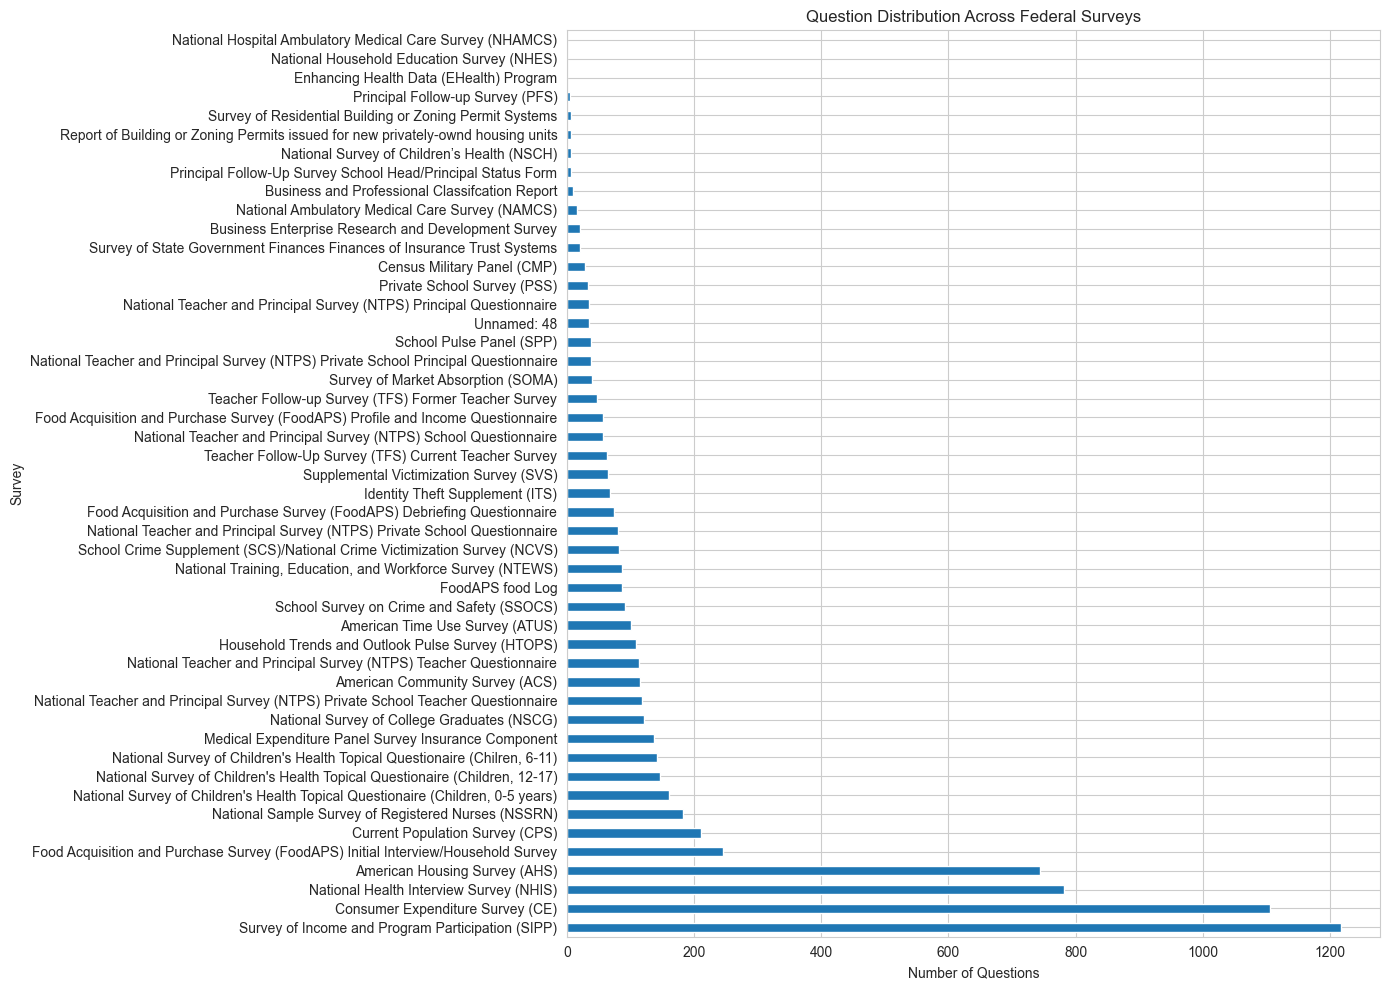

In [29]:
# Visualize survey distribution
fig, ax = plt.subplots(figsize=(14, 10))
survey_counts_df.plot(kind='barh', ax=ax, legend=False)
ax.set_xlabel('Number of Questions')
ax.set_ylabel('Survey')
ax.set_title('Question Distribution Across Federal Surveys')
plt.tight_layout()
plt.show()

## Question Overlap Analysis

In [30]:
# How many surveys does each question appear in?
df['survey_count'] = df[survey_cols].notna().sum(axis=1)

print("Questions by number of surveys:")
print(df['survey_count'].value_counts().sort_index())

Questions by number of surveys:
survey_count
0      41
1    6945
2       1
Name: count, dtype: int64


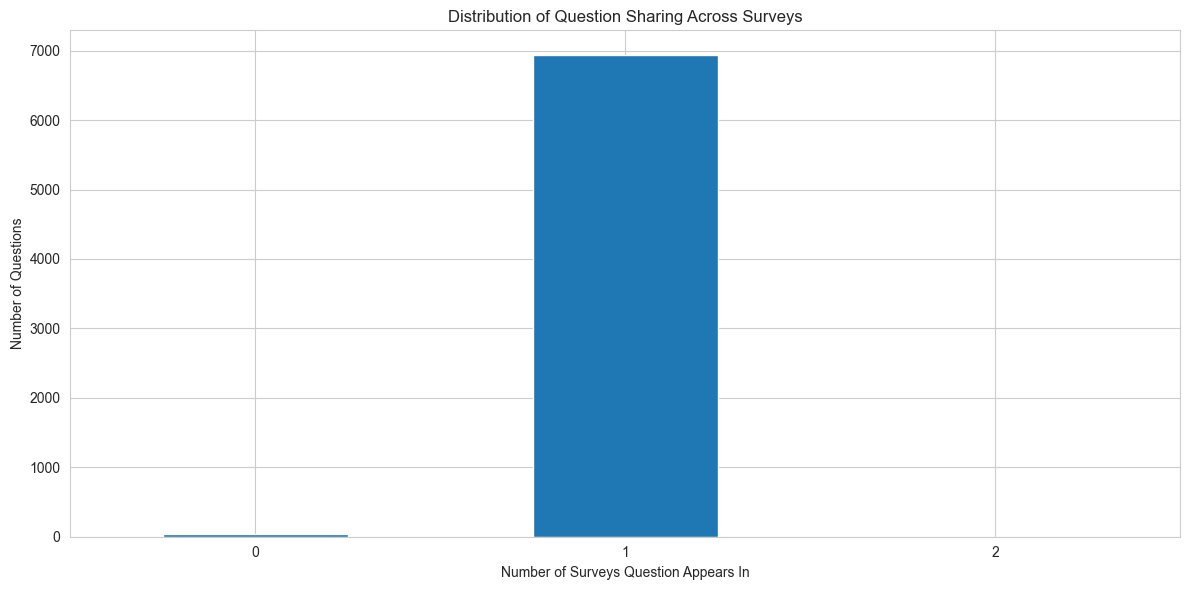

In [31]:
# Distribution of shared questions
plt.figure(figsize=(12, 6))
df['survey_count'].value_counts().sort_index().plot(kind='bar')
plt.xlabel('Number of Surveys Question Appears In')
plt.ylabel('Number of Questions')
plt.title('Distribution of Question Sharing Across Surveys')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [32]:
# Most shared questions
print("\nMost shared questions (appearing in 5+ surveys):")
shared = df[df['survey_count'] >= 5][['Question', 'survey_count']].sort_values('survey_count', ascending=False)
print(f"\nFound {len(shared)} questions appearing in 5+ surveys")
print("\nTop 10:")
for idx, row in shared.head(10).iterrows():
    print(f"\n[{row['survey_count']} surveys] {row['Question'][:100]}...")


Most shared questions (appearing in 5+ surveys):

Found 0 questions appearing in 5+ surveys

Top 10:


## Question Text Analysis

In [33]:
# Question length distribution
df['question_length'] = df['Question'].str.len()

print("Question length statistics:")
print(df['question_length'].describe())

Question length statistics:
count    6946.000000
mean      133.204002
std       126.893628
min         8.000000
25%        66.000000
50%       101.000000
75%       154.000000
max      1808.000000
Name: question_length, dtype: float64


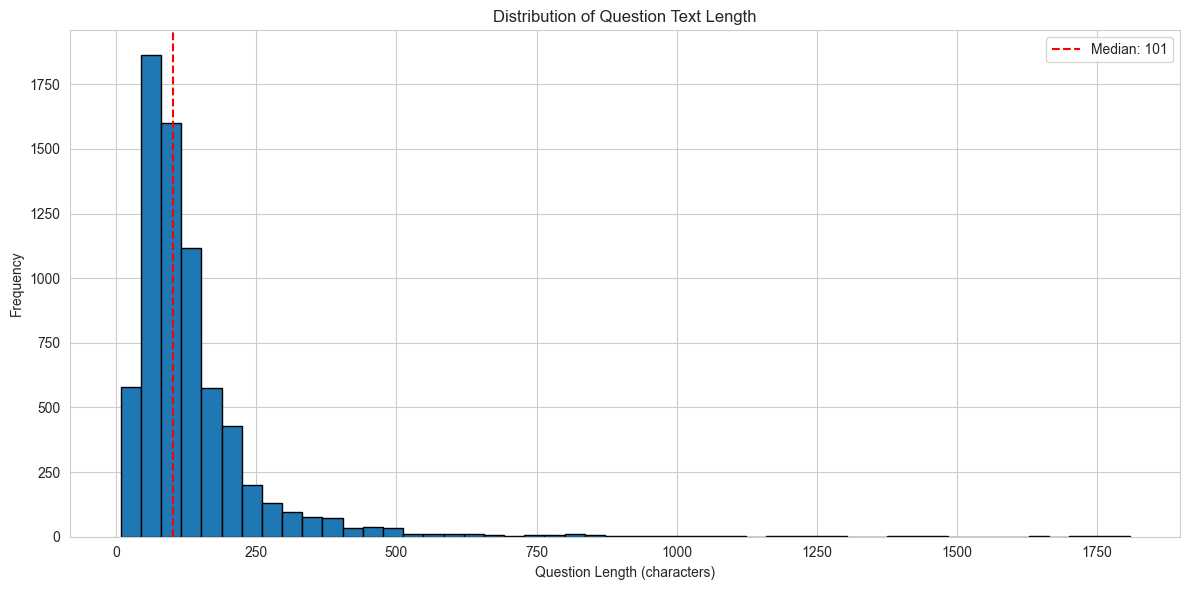

In [34]:
# Visualize length distribution
plt.figure(figsize=(12, 6))
plt.hist(df['question_length'], bins=50, edgecolor='black')
plt.xlabel('Question Length (characters)')
plt.ylabel('Frequency')
plt.title('Distribution of Question Text Length')
plt.axvline(df['question_length'].median(), color='red', linestyle='--', label=f'Median: {df["question_length"].median():.0f}')
plt.legend()
plt.tight_layout()
plt.show()

In [35]:
# Sample questions by length
print("\nShortest questions:")
for q in df.nsmallest(5, 'question_length')['Question']:
    print(f"  - {q}")

print("\nLongest questions:")
for q in df.nlargest(5, 'question_length')['Question']:
    print(f"  - {q[:200]}...")


Shortest questions:
  - COMMENTS
  - Enter age
  - Enter month
  - Why is that?
  - Why is that?

Longest questions:
  - 63. During the past 12 months, have you experienced any of the following consequences as a result of the identity theft that occurred more than 12 months ago? Have you had… a.Significant problems with...
  - To what extent do you agree or disagree with each of the following statements about your current school? a. The school administration’s behavior toward the staff is supportive and encouraging. b. I am...
  - To what extent do you agree or disagree with each of the following statements? The school administration’s behavior toward the staff is supportive and encouraging. b. I am satisfied with my teaching s...
  - To what extent do you agree or disagree with each of the following statements? a. The school administration’s behavior toward the staff is supportive and encouraging. b. I am satisfied with my teachin...
  - During the 2019–20 school year, was it a pract

## Summary Statistics

In [36]:
print("\n=== DATASET SUMMARY ===")
print(f"Total unique questions: {len(df):,}")
print(f"Total surveys: {len(survey_cols)}")
print(f"Total question-survey pairs: {total_pairs:,}")
print(f"Average questions per survey: {total_pairs / len(survey_cols):.1f}")
print(f"Average surveys per question: {df['survey_count'].mean():.2f}")
print(f"\nQuestions appearing in only 1 survey: {(df['survey_count'] == 1).sum():,} ({(df['survey_count'] == 1).sum() / len(df) * 100:.1f}%)")
print(f"Questions appearing in 2+ surveys: {(df['survey_count'] >= 2).sum():,} ({(df['survey_count'] >= 2).sum() / len(df) * 100:.1f}%)")
print(f"Questions appearing in 5+ surveys: {(df['survey_count'] >= 5).sum():,} ({(df['survey_count'] >= 5).sum() / len(df) * 100:.1f}%)")


=== DATASET SUMMARY ===
Total unique questions: 6,987
Total surveys: 48
Total question-survey pairs: 6,947
Average questions per survey: 144.7
Average surveys per question: 0.99

Questions appearing in only 1 survey: 6,945 (99.4%)
Questions appearing in 2+ surveys: 1 (0.0%)
Questions appearing in 5+ surveys: 0 (0.0%)
